# ANN

# Fashion MNIST


<br> By Margaret Maynard-Reid, 4/24/2018

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## Why Fashion-MNIST?


*   MNIST is too easy
*   MNIST is overused
*   MNIST can not represent modern Computer Vision tasks

Read more about the Fashion-MINST dataset in this paper [here](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)



In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data 반복실행 해보자

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 9 Ankle boot


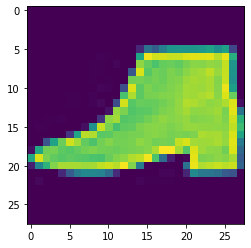

In [5]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = np.random.randint(0, 59999)
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [6]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


##  코딩 task!

1. 전처리
    * x : sc_____
    * y : _______ encoding

2. 모델링
    * model에 모델 선언
    * Input layer에 어떻게 전달할 것인지 고민 필요
    * 쭈우우우욱 늘려주는 레이어를 사용할 것 (F______)
    * 히든레이어는 최소 3개를 쓸 것!
    * 노드 수는 512개를 기본으로 시작
    * 자유롭게 바꿔가며 성능을 볼 것

3. 학습
    * epochs=50, validation_split=0.2
    * early stopping

In [8]:
#############
# Your Code #
#############
from tensorflow.keras.utils import to_categorical

len_y = len(set(y_train))

y_train = to_categorical(y_train, len_y)
y_test = to_categorical(y_test, len_y)

In [17]:
#############
# Your Code #
#############
keras.backend.clear_session()

il = keras.layers.Input(shape = (28, 28))
fl = keras.layers.Flatten()(il)
hl = keras.layers.Dense(256, activation = 'relu')(fl)
hl = keras.layers.Dense(128, activation = 'relu')(hl)
hl = keras.layers.Dense(64, activation = 'relu')(hl)
ol = keras.layers.Dense(10, activation = 'softmax')(hl)

model = keras.models.Model(il, ol)

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer='adam')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable

In [18]:
#############
# Your Code #
#############
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',         # 관측 대상!
                  patience=5,                  # 몇번이나 참을래?
                  min_delta = 0,               # loss가 현상 유지만 되어도 괜찮아
                  verbose=1,                   # 얼리스토핑이 어디서 되었는지 알려줌
                  restore_best_weights=True)   # 최적의 가중치를 모델에 넘겨줌

In [19]:
#############
# Your Code #
#############
model.fit(x_train, y_train, validation_split=0.2, callbacks=[es],
          verbose=1, epochs=50)




Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 1.4938 - accuracy: 0.7380 - val_loss: 0.5913 - val_accuracy: 0.7844
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5080 - accuracy: 0.8181 - val_loss: 0.5140 - val_accuracy: 0.8187
Epoch 3/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4532 - accuracy: 0.8386 - val_loss: 0.5116 - val_accuracy: 0.8043
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4242 - accuracy: 0.8468 - val_loss: 0.4002 - val_accuracy: 0.8568
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3953 - accuracy: 0.8560 - val_loss: 0.4013 - val_accuracy: 0.8588
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3832 - accuracy: 0.8608 - val_loss: 0.4000 - val_accuracy: 0.8634
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3623 - accuracy: 0.8676 - val_loss: 0.3665 - val_accuracy:

In [ ]:
#############
# Your Code #
#############


## Visualize prediction

위에서 지키라고 한 사항들 안지키면 동작을 안할껄...?

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])
y_hat = model.predict(x_test).argmax(axis=1)


 Test accuracy: 0.8672000169754028


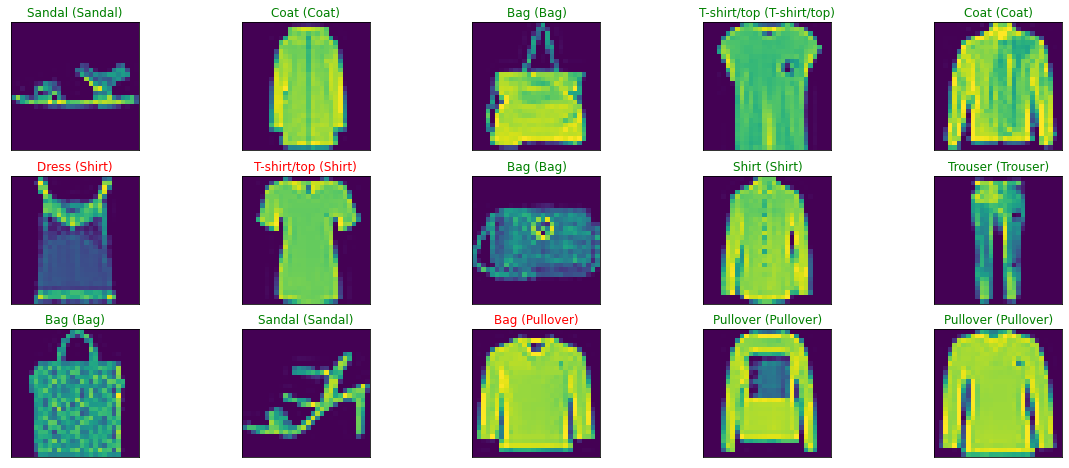

In [24]:
####### 반복실행해보자

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index].reshape([28,-1]) ) )
    predict_index = y_hat[index]
    true_index = y_test[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))